# Coleta de Dados (DataFrames)

In [1]:
# Importando as bibliotecas necessárias para o projeto
import pandas as pd
import os
import requests
import tweepy
import json
import time
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

### 1º Dados em mãos

In [2]:
# Carregando o dataframe 'twitter_archive_enhanced.csv'
twitter = pd.read_csv('twitter-archive-enhanced.csv')

### 2º Dados localizados nos servidores da Udacity

In [3]:
# Baixando o dataframe 'image_predictions.tsv'
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [4]:
with open(os.path.join(folder_name,
                        url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [5]:
# Carregando o dataframe 'image_predictions.tsv'
twitter_imagens = pd.read_csv('image_predictions/image-predictions.tsv', sep='\t')

### 3º Dados do API do Twitter

In [6]:
# Chaves de acesso para o API do Twitter
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [7]:
# Criando uma lista com os ids dos tweets
id_tweets = list(twitter['tweet_id'])

In [8]:
# Lista de id_tweets com deram erro
tweets_erro = []
# Lista de tweets
tweets_df = []
# Tempo inicio
inicio = time.time()

# Iteração para download dos tweets de acordo com os ids da lista "id_tweets"
for tweet_id in id_tweets:
    try:
        tweet = api.get_status(tweet_id,
                               tweet_mode = 'extented',
                               wait_on_rate_limit = True,
                               wait_on_rate_milit_notify = True)._json
        tweets_df.append(tweet)
    except Exception:
        print("Id que deu erro: " + str(tweet_id))
        tweets_erro.append(tweet_id)
# Tempo final
fim = time.time()
# Calculando tempo do processamento
print(fim - inicio)

Id que deu erro: 888202515573088257
Id que deu erro: 873697596434513921
Id que deu erro: 872668790621863937
Id que deu erro: 869988702071779329
Id que deu erro: 866816280283807744
Id que deu erro: 861769973181624320
Id que deu erro: 845459076796616705
Id que deu erro: 842892208864923648
Id que deu erro: 837012587749474308
Id que deu erro: 827228250799742977
Id que deu erro: 802247111496568832
Id que deu erro: 775096608509886464
Id que deu erro: 770743923962707968
Id que deu erro: 754011816964026368
2084.6652359962463


In [9]:
# Tamanho dos resultados ok
print(len(tweets_df) , "ids foram carregados com sucesso!")
# Tamanho dos resultados que deram erro
print(len(tweets_erro) , "ids deram erro!")

2342 ids foram carregados com sucesso!
14 ids deram erro!


In [10]:
# Criando um DataFrame
json_tweets = pd.DataFrame(tweets_df)

In [11]:
# Salvando o Dataframe como tweet_json.txt
json_tweets.to_csv('tweet_json.txt', encoding = 'utf-8', index=False)

# Avaliando os Dados (Dataframes)

In [12]:
# Visualizando os dados do dataframe twitter
twitter

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [13]:
# Visualizando os dados do dataframe twitter_imagens
twitter_imagens

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [14]:
# Visualizando os dados do dataframe json_tweets
json_tweets

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",38210,False,None,892420643555336193,892420643555336193,...,NaN,NaN,NaN,8371,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,32758,False,None,892177421306343426,892177421306343426,...,NaN,NaN,NaN,6179,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,True,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,24665,False,None,891815181378084864,891815181378084864,...,NaN,NaN,NaN,4091,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,True,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,None,None,Sun Jul 30 15:58:51 +0000 2017,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",41541,False,None,891689557279858688,891689557279858688,...,NaN,NaN,NaN,8506,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,None,None,Sat Jul 29 16:00:24 +0000 2017,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,39726,False,None,891327558926688256,891327558926688256,...,NaN,NaN,NaN,9212,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,True,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
5,None,None,Sat Jul 29 00:08:17 +0000 2017,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,19938,False,None,891087950875897856,891087950875897856,...,NaN,NaN,NaN,3064,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,True,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
6,None,None,Fri Jul 28 16:27:12 +0000 2017,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,11668,False,None,890971913173991426,890971913173991426,...,NaN,NaN,NaN,2033,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,True,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
7,None,None,Fri Jul 28 00:22:40 +0000 2017,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,64480,False,None,890729181411237888,890729181411237888,...,NaN,NaN,NaN,18576,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,True,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
8,None,None,Thu Jul 27 16:25:51 +0000 2017,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,27399,False,None,890609185150312448,890609185150312448,...,NaN,NaN,NaN,4206,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,True,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
9,None,None,Wed Jul 26 15:59:51 +0000 2017,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,31452,False,None,890240255349198849,890240255349198849,...,NaN,NaN,NaN,7271,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,True,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [15]:
# Informações do dataframe twitter
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [16]:
# Informações do dataframe twitter_imagens
twitter_imagens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
# Informações do dataframe json_tweets
json_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 30 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2342 non-null object
entities                         2342 non-null object
extended_entities                1823 non-null object
favorite_count                   2342 non-null int64
favorited                        2342 non-null bool
geo                              0 non-null object
id                               2342 non-null int64
id_str                           2342 non-null object
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null object
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null object
is_quote_status                  2342 non-null bool
lang                             2342 non-null objec

In [18]:
twitter.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [19]:
twitter_imagens.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [20]:
json_tweets.describe()

,favorite_count,id,in_reply_to_status_id,in_reply_to_user_id,quoted_status_id,retweet_count
count,2342.000000,2.342000e+03,7.700000e+01,7.700000e+01,2.600000e+01,2342.000000
mean,8001.324936,7.422212e+17,7.440692e+17,2.040329e+16,8.113972e+17,2951.055935
std,12383.073934,6.832408e+16,7.524295e+16,1.260797e+17,6.295843e+16,4963.048021
min,0.000000,6.660209e+17,6.658147e+17,1.185634e+07,6.721083e+17,0.000000
25%,1383.000000,6.783509e+17,6.757073e+17,3.589728e+08,7.761338e+17,592.500000
50%,3483.500000,7.186224e+17,7.032559e+17,4.196984e+09,8.281173e+17,1377.000000
75%,9805.500000,7.986971e+17,8.233264e+17,4.196984e+09,8.637581e+17,3442.250000
max,164915.000000,8.924206e+17,8.862664e+17,8.405479e+17,8.860534e+17,84101.000000


In [21]:
twitter['name']

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
5           None
6            Jax
7           None
8           Zoey
9         Cassie
10          Koda
11         Bruno
12          None
13           Ted
14        Stuart
15        Oliver
16           Jim
17          Zeke
18       Ralphus
19        Canela
20        Gerald
21       Jeffrey
22          such
23        Canela
24          None
25          None
26          Maya
27        Mingus
28         Derek
29        Roscoe
          ...   
2326       quite
2327           a
2328        None
2329        None
2330        None
2331        None
2332        None
2333          an
2334           a
2335          an
2336        None
2337        None
2338        None
2339        None
2340        None
2341        None
2342        None
2343        None
2344        None
2345         the
2346         the
2347           a
2348           a
2349          an
2350           a
2351        None
2352           a
2353          

### Problemas de Qualidade

`DataFrame twitter`

- **Coluna retweeted_status_id:** tweets retweetados;
- **Coluna tweet_id:** Tipo de dado "int64";
- **Coluna timestamp:** Tipo de dado "object";
- **Coluna rating_numerator:** Tipo de dado de "int64";
- **Coluna rating_denominator:** Tipo de dado de "int64";
- **Coluna name**: Nomes inconsistentes como "a", "an", "the", "such", ...

`DataFrame twitter_imagens`

- **Coluna tweet_id:** Tipo de dado "int64";
- Colunas **p1**, **p2** e **p3** raças em caixa alta e caixa baixa;
- Colunas **p1**, **p2** e **p3** reças com separador underline.

`DataFrame json_tweets`

- **Coluna retweeted_status:** tweets retweetados;
- **Coluna id:** Tipo de dado "int64";
- **Coluna id:** Descrição da coluna diferente dos outros DataFrame.


### Problemas de Arrumação

`DataFrame twitter`

- **Colunas desnecessárias:** Colunas desnecessárias 'timestamp', 'retweeted_status_user_id', 'retweeted_status_id', 'retweeted_status_timestamp', 'in_reply_to_status_id', 'in_reply_to_user_id', 'in_reply_to_status_id', 'expanded_urls', 'source';
- Falta o estágio do cachorro em uma única coluna;
- Colunas com títulos em inglês;
- Ordenação das colunas dificulta a visualização.

`DataFrame twitter_imagens`
- Colunas com títulos em inglês.

`DataFrame json_tweets`

- **Colunas desnecessárias:** Colunas desnecessárias ('contributors', 'coordinates', 'created_at', 'entities', 'extended_entities', 'favorited', 'geo', 'id_str', 'source', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable', 'quoted_status', 'quoted_status_id', 'quoted_status_id_str', 'retweeted', 'retweeted_status', 'truncated', 'user');
- Colunas com títulos em inglês;
- Ordenação das colunas dificulta a visualização

# Limpeza dos Dados (DataFrames)

### Cópias dos DataFrame para Limpeza

In [22]:
# Cópia do DataFrame 'twitter_clean'
twitter_clean = twitter.copy()

In [23]:
# Cópia do DataFrame 'twitter_imagens'
twitter_imagens_clean = twitter_imagens.copy()

In [24]:
# Cópia do DataFrame 'json_tweets'
json_tweets_clean = json_tweets.copy()

## Visão Geral das Definições:: Problemas de Qualidade

`DataFrame twitter_clean`

- Excluir os retweets, deixando somente os tweets originais
- **Coluna tweet_id:** Trocar tipo de dado "int64" para string ("str")
- **Coluna timestamp:** Trocar tipo de dado "object" para data
- **Coluna rating_numerator:** Trocar tipo de dado de "int64" para float
- **Coluna rating_denominator:** Trocar tipo de dado de "int64" para float
- **Coluna name**: Trocar por 'None' os nomes inconsistentes como "a", "an", "the", "such", ...

`DataFrame twitter_imagens_clean`

- **Coluna tweet_id:** Trocar tipo de dado "int64" para string ("str")
- Padronizar as colunas **p1**, **p2** e **p3** colocando todas as raças em caixa baixa (letras minúsculas)
- Retirar o _underline_ das colunas **p1**, **p2** e **p3**

`DataFrame json_tweets_clean`

- Excluir os retweets, deixando somente os tweets originais
- **Coluna id:** Trocar tipo de dado "int64" para string ("str")
- **Coluna id:** Trocar descrição da coluna para tweet_id
 

### Definição
No DataFrame `twitter_clean` excluir os retweets, deixando somente os tweets originais

### Codificação

In [25]:
# Removendo os retweets
twitter_clean.drop(twitter_clean[twitter_clean['retweeted_status_id'].notnull()== True].index,inplace=True)

### Teste

In [26]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

### Definição
No DataFrame `twitter_clean` (coluna tweet_id) trocar tipo de dado "int64" para string ("str")

### Codificação

In [27]:
# Coluna tweet_id (DataFrame twtter_clean): Trocar tipo de dado "int64" para string ("str")
twitter_clean.tweet_id = twitter_clean.tweet_id.astype(str)

### Teste

In [28]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(2), object(

### Definição
No DataFrame `twitter_clean` (coluna timestamp) trocar tipo de dado "object" para data

### Codificação

In [29]:
# Convertendo o dados de tempo de str para data
twitter_clean['timestamp'] = pd.to_datetime(twitter_clean['timestamp'])

# Extraindo a data do tweets
twitter_clean['date'] = twitter_clean['timestamp'].apply(lambda time: time.strftime('%m-%d-%Y'))
twitter_clean['time'] = twitter_clean['timestamp'].apply(lambda time: time.strftime('%H:%M'))

#Convertendo as colunas de data e hora para data
twitter_clean['date'] = pd.to_datetime(twitter_clean['date'])

### Teste

In [30]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 19 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
date                         

In [31]:
twitter_clean.head(25)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,2017-08-01,16:23
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,2017-08-01,00:17
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,2017-07-31,00:18
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,2017-07-30,15:58
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,2017-07-29,16:00
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None,2017-07-29,00:08
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None,2017-07-28,16:27
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None,2017-07-28,00:22
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None,2017-07-27,16:25
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None,2017-07-26,15:59


### Definição
No DataFrame `twitter_clean` (colunas rating_numerator e rating_denominator) trocar tipo de dado de "int64" para float

### Codificação

In [32]:
# Convertendo rating_numerator para float
twitter_clean.rating_numerator = twitter_clean.rating_numerator.astype(float)

In [33]:
# Convertendo rating_denominator para float
twitter_clean.rating_denominator = twitter_clean.rating_numerator.astype(float)

### Teste

In [34]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 19 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null float64
rating_denominator            2175 non-null float64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
date                     

### Definição
No DataFrame `twitter_clean` (coluna name) trocar por 'None' os nomes inconsistentes como "a", "an", "the", "such", ...

### Codificação

In [35]:
# Alterar para 'None' os nomes inconsistentes
nome = {'such': 'None',
                'a': 'None',
                'an': 'None',
                'the': 'None',
                'quite': 'None',
                'my': 'None',
                'O': 'None',
                'not': 'None',
                'this': 'None',
                'very': 'None',
                'unacceptable': 'None',
                'life': 'None',
                'light': 'None',
                'by': 'None',
                'just': 'None',
                'getting': 'None'}

def nome_dog(twitter_clean):
    if twitter_clean['name'] in nome.keys():
        dog_name = nome[twitter_clean['name']]
        return dog_name
    else:
        return twitter_clean['name']
    
twitter_clean['name'] = twitter_clean.apply(nome_dog, axis=1)

In [36]:
twitter_clean.name.value_counts()

None          771
Charlie        11
Lucy           11
Cooper         10
Oliver         10
Penny           9
Tucker          9
Winston         8
Sadie           8
Lola            8
Toby            7
Daisy           7
Bo              6
Oscar           6
Jax             6
Bailey          6
Stanley         6
Koda            6
Bella           6
Louis           5
Rusty           5
Scout           5
Bentley         5
Milo            5
Buddy           5
Chester         5
Leo             5
Dave            5
Alfie           4
Chip            4
             ... 
Socks           1
Luther          1
Timmy           1
Doobert         1
Newt            1
Richie          1
Lilah           1
Amélie          1
Berkeley        1
Darby           1
Ulysses         1
Chesterson      1
Kona            1
Ralphé          1
Zara            1
Timison         1
Orion           1
Sobe            1
Leela           1
Clybe           1
Bookstore       1
Anna            1
Henry           1
Baloo           1
Tedders   

### Definição
No DataFrame `twitter_imagens_clean` (coluna tweet_id) trocar tipo de dado "int64" para string ("str")

### Codificação

In [37]:
# Coluna tweet_id (DataFrame Twitter_imagens_clean): Trocar tipo de dado "int64" para string ("str")
twitter_imagens_clean.tweet_id = twitter_imagens_clean.tweet_id.astype(str)

### Teste

In [38]:
twitter_imagens_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Definição
No DataFrame `twitter_imagens_clean` padronizar as colunas p1, p2 e p3 colocando todas as raças em caixa baixa (letras minúsculas)

### Codificação

In [39]:
# Colocando as raças em caixa baixa
twitter_imagens_clean['p1'] = twitter_imagens_clean['p1'].str.lower()
twitter_imagens_clean['p2'] = twitter_imagens_clean['p2'].str.lower()
twitter_imagens_clean['p3'] = twitter_imagens_clean['p3'].str.lower()

### Teste

In [40]:
twitter_imagens_clean.head(25)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,bernese_mountain_dog,0.651137,True,english_springer,0.263788,True,greater_swiss_mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


### Definição
No DataFrame `twitter_imagens_clean` retirar o underline das colunas p1, p2 e p3

### Codificação

In [41]:
# Retirando os underlines das colunas p1, p2 e p3
twitter_imagens_clean['p1'] = twitter_imagens_clean['p1'].str.replace('_',' ')
twitter_imagens_clean['p2'] = twitter_imagens_clean['p2'].str.replace('_',' ')
twitter_imagens_clean['p3'] = twitter_imagens_clean['p3'].str.replace('_',' ')

### Teste

In [42]:
twitter_imagens_clean.head(25)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh springer spaniel,0.465074,True,collie,0.156665,True,shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,bernese mountain dog,0.651137,True,english springer,0.263788,True,greater swiss mountain dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box turtle,0.933012,False,mud turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,tibetan mastiff,0.058279,True,fur coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping cart,0.962465,False,shopping basket,0.014594,False,golden retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature poodle,0.201493,True,komondor,0.192305,True,soft-coated wheaten terrier,0.082086,True


### Definição
No DataFrame `json_tweets_clean` excluir os retweets, deixando somente os tweets originais

### Codificação

In [43]:
# Removendo os retweets
json_tweets_clean.drop(json_tweets_clean[json_tweets_clean['retweeted_status'].notnull()== True].index,inplace=True)

### Teste

In [44]:
json_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 0 to 2341
Data columns (total 30 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2174 non-null object
entities                         2174 non-null object
extended_entities                1748 non-null object
favorite_count                   2174 non-null int64
favorited                        2174 non-null bool
geo                              0 non-null object
id                               2174 non-null int64
id_str                           2174 non-null object
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null object
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null object
is_quote_status                  2174 non-null bool
lang                             2174 non-null objec

### Definição
No DataFrame `json_tweets_clean` (coluna id) trocar tipo de dado "int64" para string ("str")

### Codificação

In [45]:
# Coluna tweet_id (DataFrame twtter_clean): Trocar tipo de dado "int64" para string ("str")
json_tweets_clean.id = json_tweets_clean.id.astype(str)

### Teste

In [46]:
json_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 30 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2342 non-null object
entities                         2342 non-null object
extended_entities                1823 non-null object
favorite_count                   2342 non-null int64
favorited                        2342 non-null bool
geo                              0 non-null object
id                               2342 non-null int64
id_str                           2342 non-null object
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null object
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null object
is_quote_status                  2342 non-null bool
lang                             2342 non-null objec

### Definição
No DataFrame `json_tweets_clean` (coluna id) trocar descrição da coluna para tweet_id

### Codificação

In [47]:
json_tweets_clean.rename(columns={'id': 'tweet_id'}, inplace=True)

### Teste

In [48]:
json_tweets_clean.columns

Index(['contributors', 'coordinates', 'created_at', 'entities',
       'extended_entities', 'favorite_count', 'favorited', 'geo', 'tweet_id',
       'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'place',
       'possibly_sensitive', 'possibly_sensitive_appealable', 'quoted_status',
       'quoted_status_id', 'quoted_status_id_str', 'retweet_count',
       'retweeted', 'retweeted_status', 'source', 'text', 'truncated', 'user'],
      dtype='object')

## Visão Geral das Definições: Problemas de Arrumação

`DataFrame twitter_clean`

- **Colunas desnecessárias:** Excluir as colunas 'timestamp', 'retweeted_status_user_id', 'retweeted_status_id', 'retweeted_status_timestamp', 'in_reply_to_status_id', 'in_reply_to_user_id', 'in_reply_to_status_id', 'expanded_urls', 'source'
- Colocar o estágio do cachorro em uma única coluna.
- Excluir colunas desnecessárias ('doggo', 'floofer', 'pupper', 'puppo') após a criação do coluna stage
- Renomear as colunas para português
- Ordenar as colunas para melhor visualização

`DataFrame twitter_imagens_clean`
- Renomear as colunas para português

`DataFrame json_tweets_clean`

- **Colunas desnecessárias:** Excluir colunas desnecessárias ('contributors', 'coordinates', 'created_at', 'entities', 'extended_entities', 'favorited', 'geo', 'id_str', 'source', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable', 'quoted_status', 'quoted_status_id', 'quoted_status_id_str', 'retweeted', 'retweeted_status', 'truncated', 'user')
- Renomear as colunas para português
- Ordenar as colunas para melhor visualização

### Definição
No `DataFrame twitter_clean` excluir desnecessárias (as colunas 'timestamp', 'retweeted_status_user_id', 'retweeted_status_id', 'retweeted_status_timestamp', 'in_reply_to_status_id', 'in_reply_to_user_id', 'in_reply_to_status_id', 'expanded_urls', 'source')

### Codificação

In [49]:
# Removendo as colunas indesejadas
twitter_clean.drop(['timestamp',
               'retweeted_status_user_id',
               'retweeted_status_id',
               'retweeted_status_timestamp',
               'in_reply_to_status_id',
               'in_reply_to_user_id',
               'in_reply_to_status_id',
               'expanded_urls',
               'source'], axis=1,inplace=True)

### Teste

In [50]:
twitter_clean

,tweet_id,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,13.0,13.0,Phineas,None,None,None,None,2017-08-01,16:23
1,892177421306343426,This is Tilly. She's just checking pup on you....,13.0,13.0,Tilly,None,None,None,None,2017-08-01,00:17
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12.0,12.0,Archie,None,None,None,None,2017-07-31,00:18
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,13.0,13.0,Darla,None,None,None,None,2017-07-30,15:58
4,891327558926688256,This is Franklin. He would like you to stop ca...,12.0,12.0,Franklin,None,None,None,None,2017-07-29,16:00
5,891087950875897856,Here we have a majestic great white breaching ...,13.0,13.0,None,None,None,None,None,2017-07-29,00:08
6,890971913173991426,Meet Jax. He enjoys ice cream so much he gets ...,13.0,13.0,Jax,None,None,None,None,2017-07-28,16:27
7,890729181411237888,When you watch your owner call another dog a g...,13.0,13.0,None,None,None,None,None,2017-07-28,00:22
8,890609185150312448,This is Zoey. She doesn't want to be one of th...,13.0,13.0,Zoey,None,None,None,None,2017-07-27,16:25
9,890240255349198849,This is Cassie. She is a college pup. Studying...,14.0,14.0,Cassie,doggo,None,None,None,2017-07-26,15:59


### Definição
No DataFrame `twitter_clean` colocar o estágio do cachorro em uma única coluna

### Codificação

In [51]:
# criando coluna stage
twitter_clean['stage'] = twitter_clean[['doggo', 'floofer','pupper','puppo']].apply(lambda x: ''.join(x), axis=1)

estagio = {'doggoNoneNoneNone': 'doggo',
                'NoneflooferNoneNone': 'floofer',
                'NoneNonepupperNone': 'pupper',
                'NoneNoneNonepuppo': 'puppo',
                'NoneNoneNoneNone': 'None'}

def estagio_dog(twitter_clean):
    if twitter_clean['stage'] in estagio.keys():
        dog = estagio[twitter_clean['stage']]
        return dog
    else:
        return twitter_clean['stage']
    
twitter_clean['stage'] = twitter_clean.apply(estagio_dog, axis=1)

### Teste

In [52]:
twitter_clean

,tweet_id,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time,stage
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,13.0,13.0,Phineas,None,None,None,None,2017-08-01,16:23,None
1,892177421306343426,This is Tilly. She's just checking pup on you....,13.0,13.0,Tilly,None,None,None,None,2017-08-01,00:17,None
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12.0,12.0,Archie,None,None,None,None,2017-07-31,00:18,None
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,13.0,13.0,Darla,None,None,None,None,2017-07-30,15:58,None
4,891327558926688256,This is Franklin. He would like you to stop ca...,12.0,12.0,Franklin,None,None,None,None,2017-07-29,16:00,None
5,891087950875897856,Here we have a majestic great white breaching ...,13.0,13.0,None,None,None,None,None,2017-07-29,00:08,None
6,890971913173991426,Meet Jax. He enjoys ice cream so much he gets ...,13.0,13.0,Jax,None,None,None,None,2017-07-28,16:27,None
7,890729181411237888,When you watch your owner call another dog a g...,13.0,13.0,None,None,None,None,None,2017-07-28,00:22,None
8,890609185150312448,This is Zoey. She doesn't want to be one of th...,13.0,13.0,Zoey,None,None,None,None,2017-07-27,16:25,None
9,890240255349198849,This is Cassie. She is a college pup. Studying...,14.0,14.0,Cassie,doggo,None,None,None,2017-07-26,15:59,doggo


### Definição
No DataFrame `twitter_clean` excluir colunas desnecessárias ('doggo', 'floofer', 'pupper', 'puppo') após a criação do coluna stage

### Codificação

In [53]:
# Excluído as colunas 'doggo', 'floofer', 'pupper', 'puppo' que não são mais necessárias
twitter_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1,inplace=True)

### Teste

In [54]:
twitter_clean.head(25)

,tweet_id,text,rating_numerator,rating_denominator,name,date,time,stage
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,13.0,13.0,Phineas,2017-08-01,16:23,None
1,892177421306343426,This is Tilly. She's just checking pup on you....,13.0,13.0,Tilly,2017-08-01,00:17,None
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12.0,12.0,Archie,2017-07-31,00:18,None
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,13.0,13.0,Darla,2017-07-30,15:58,None
4,891327558926688256,This is Franklin. He would like you to stop ca...,12.0,12.0,Franklin,2017-07-29,16:00,None
5,891087950875897856,Here we have a majestic great white breaching ...,13.0,13.0,None,2017-07-29,00:08,None
6,890971913173991426,Meet Jax. He enjoys ice cream so much he gets ...,13.0,13.0,Jax,2017-07-28,16:27,None
7,890729181411237888,When you watch your owner call another dog a g...,13.0,13.0,None,2017-07-28,00:22,None
8,890609185150312448,This is Zoey. She doesn't want to be one of th...,13.0,13.0,Zoey,2017-07-27,16:25,None
9,890240255349198849,This is Cassie. She is a college pup. Studying...,14.0,14.0,Cassie,2017-07-26,15:59,doggo


### Definição
No DataFrame `twitter_clean` renomear as colunas para português

### Codificação

In [55]:
twitter_clean.columns = ['tweet_id', 'texto', 'numerador_avaliacao', 'denominador_avaliacao', 'nome_cao', 'data_tweet', 'hora_tweet', 'estagio_cao']

### Teste

In [56]:
twitter_clean.head()

,tweet_id,texto,numerador_avaliacao,denominador_avaliacao,nome_cao,data_tweet,hora_tweet,estagio_cao
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,13.0,13.0,Phineas,2017-08-01,16:23,None
1,892177421306343426,This is Tilly. She's just checking pup on you....,13.0,13.0,Tilly,2017-08-01,00:17,None
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12.0,12.0,Archie,2017-07-31,00:18,None
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,13.0,13.0,Darla,2017-07-30,15:58,None
4,891327558926688256,This is Franklin. He would like you to stop ca...,12.0,12.0,Franklin,2017-07-29,16:00,None


### Definição
No DataFrame `twitter_clean` ordenar as colunas para melhor visualização

### Codificação

In [57]:
# Reordenando as colunas
twitter_clean = twitter_clean.reindex(columns= ['tweet_id', 'data_tweet', 'hora_tweet', 'nome_cao', 'estagio_cao', 'texto', 'numerador_avaliacao', 'denominador_avaliacao'])

### Teste

In [58]:
twitter_clean.head()

,tweet_id,data_tweet,hora_tweet,nome_cao,estagio_cao,texto,numerador_avaliacao,denominador_avaliacao
0,892420643555336193,2017-08-01,16:23,Phineas,None,This is Phineas. He's a mystical boy. Only eve...,13.0,13.0
1,892177421306343426,2017-08-01,00:17,Tilly,None,This is Tilly. She's just checking pup on you....,13.0,13.0
2,891815181378084864,2017-07-31,00:18,Archie,None,This is Archie. He is a rare Norwegian Pouncin...,12.0,12.0
3,891689557279858688,2017-07-30,15:58,Darla,None,This is Darla. She commenced a snooze mid meal...,13.0,13.0
4,891327558926688256,2017-07-29,16:00,Franklin,None,This is Franklin. He would like you to stop ca...,12.0,12.0


### Definição
No DataFrame `twitter_imagens_clean` renomear as colunas para português


### Codificação

In [59]:
twitter_imagens_clean.columns = ['tweet_id', 'url_imagem', 'num_imagens', 'raca_possivel_1', 'confiabilidade_1', 'teste_verdade_1', 'raca_possivel_2', 'confiabilidade_2', 'teste_verdade_2', 'raca_possivel_3', 'confiabilidade_3', 'teste_verdade_3']

### Teste

In [60]:
twitter_imagens_clean.head()

,tweet_id,url_imagem,num_imagens,raca_possivel_1,confiabilidade_1,teste_verdade_1,raca_possivel_2,confiabilidade_2,teste_verdade_2,raca_possivel_3,confiabilidade_3,teste_verdade_3
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh springer spaniel,0.465074,True,collie,0.156665,True,shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


### Definição
No DataFrame `json_tweets_clean` excluir colunas desnecessárias ('contributors', 'coordinates', 'created_at', 'entities', 'extended_entities', 'favorited', 'geo', 'id_str', 'source', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable', 'quoted_status', 'quoted_status_id', 'quoted_status_id_str', 'retweeted', 'retweeted_status', 'truncated', 'user')

### Codificação

In [61]:
json_tweets_clean.drop(['contributors',
                        'coordinates',
                        'created_at',
                        'entities',
                        'extended_entities',
                        'favorited',
                        'geo',
                        'id_str',
                        'source',
                        'in_reply_to_screen_name',
                        'in_reply_to_status_id',
                        'in_reply_to_status_id_str',
                        'in_reply_to_user_id',
                        'in_reply_to_user_id_str',
                        'is_quote_status',
                        'lang',
                        'place',
                        'possibly_sensitive',
                        'possibly_sensitive_appealable',
                        'quoted_status',
                        'quoted_status_id',
                        'quoted_status_id_str',
                        'retweeted',
                        'retweeted_status',
                        'truncated',
                        'user'], axis=1,inplace=True)

### Teste

In [62]:
json_tweets_clean.head()

,favorite_count,tweet_id,retweet_count,text
0,38210,892420643555336193,8371,This is Phineas. He's a mystical boy. Only eve...
1,32758,892177421306343426,6179,This is Tilly. She's just checking pup on you....
2,24665,891815181378084864,4091,This is Archie. He is a rare Norwegian Pouncin...
3,41541,891689557279858688,8506,This is Darla. She commenced a snooze mid meal...
4,39726,891327558926688256,9212,This is Franklin. He would like you to stop ca...


### Definição
No DataFrame `json_tweets_clean` renomear as colunas para português

### Codificação

In [63]:
json_tweets_clean.columns = ['qtd_likes', 'tweet_id', 'qtd_retweets', 'texto']

### Teste

In [64]:
json_tweets_clean.columns

Index(['qtd_likes', 'tweet_id', 'qtd_retweets', 'texto'], dtype='object')

### Definição
No DataFrame `json_tweets_clean` ordenar as colunas para melhor visualização

### Codificação

In [65]:
json_tweets_clean = json_tweets_clean.reindex(columns= ['tweet_id', 'texto', 'qtd_likes', 'qtd_retweets'])

### Teste

In [66]:
json_tweets_clean.head()

,tweet_id,texto,qtd_likes,qtd_retweets
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,38210,8371
1,892177421306343426,This is Tilly. She's just checking pup on you....,32758,6179
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,24665,4091
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,41541,8506
4,891327558926688256,This is Franklin. He would like you to stop ca...,39726,9212


# DataFrame Limpo

### Definição
Agrupar os DataFrames em um só

### Codificação

In [67]:
df_1 = pd.merge(twitter_clean, twitter_imagens_clean, on='tweet_id', how='outer')

In [68]:
twitter_archive_master = pd.merge(df_1, json_tweets_clean, on='tweet_id', how='outer')

### Teste

In [69]:
twitter_archive_master

,tweet_id,data_tweet,hora_tweet,nome_cao,estagio_cao,texto_x,numerador_avaliacao,denominador_avaliacao,url_imagem,num_imagens,...,teste_verdade_1,raca_possivel_2,confiabilidade_2,teste_verdade_2,raca_possivel_3,confiabilidade_3,teste_verdade_3,texto_y,qtd_likes,qtd_retweets
0,892420643555336193,2017-08-01,16:23,Phineas,None,This is Phineas. He's a mystical boy. Only eve...,13.0,13.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,...,False,bagel,0.085851,False,banana,0.076110,False,This is Phineas. He's a mystical boy. Only eve...,38210.0,8371.0
1,892177421306343426,2017-08-01,00:17,Tilly,None,This is Tilly. She's just checking pup on you....,13.0,13.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,...,True,pekinese,0.090647,True,papillon,0.068957,True,This is Tilly. She's just checking pup on you....,32758.0,6179.0
2,891815181378084864,2017-07-31,00:18,Archie,None,This is Archie. He is a rare Norwegian Pouncin...,12.0,12.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,...,True,malamute,0.078253,True,kelpie,0.031379,True,This is Archie. He is a rare Norwegian Pouncin...,24665.0,4091.0
3,891689557279858688,2017-07-30,15:58,Darla,None,This is Darla. She commenced a snooze mid meal...,13.0,13.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,...,False,labrador retriever,0.168086,True,spatula,0.040836,False,This is Darla. She commenced a snooze mid meal...,41541.0,8506.0
4,891327558926688256,2017-07-29,16:00,Franklin,None,This is Franklin. He would like you to stop ca...,12.0,12.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,...,True,english springer,0.225770,True,german short-haired pointer,0.175219,True,This is Franklin. He would like you to stop ca...,39726.0,9212.0
5,891087950875897856,2017-07-29,00:08,None,None,Here we have a majestic great white breaching ...,13.0,13.0,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1.0,...,True,irish terrier,0.116317,True,indian elephant,0.076902,False,Here we have a majestic great white breaching ...,19938.0,3064.0
6,890971913173991426,2017-07-28,16:27,Jax,None,Meet Jax. He enjoys ice cream so much he gets ...,13.0,13.0,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1.0,...,True,border collie,0.199287,True,ice lolly,0.193548,False,Meet Jax. He enjoys ice cream so much he gets ...,11668.0,2033.0
7,890729181411237888,2017-07-28,00:22,None,None,When you watch your owner call another dog a g...,13.0,13.0,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2.0,...,True,eskimo dog,0.178406,True,pembroke,0.076507,True,When you watch your owner call another dog a g...,64480.0,18576.0
8,890609185150312448,2017-07-27,16:25,Zoey,None,This is Zoey. She doesn't want to be one of th...,13.0,13.0,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1.0,...,True,irish setter,0.193054,True,chesapeake bay retriever,0.118184,True,This is Zoey. She doesn't want to be one of th...,27399.0,4206.0
9,890240255349198849,2017-07-26,15:59,Cassie,doggo,This is Cassie. She is a college pup. Studying...,14.0,14.0,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1.0,...,True,cardigan,0.451038,True,chihuahua,0.029248,True,This is Cassie. She is a college pup. Studying...,31452.0,7271.0


### Definição
Salvar o DataFrame em.csv

### Codificação

In [70]:
# Salvando em csv
twitter_archive_master.to_csv('twitter_archive_master.csv')

### Teste

In [71]:
df = pd.read_csv('twitter_archive_master.csv')
df

,Unnamed: 0,tweet_id,data_tweet,hora_tweet,nome_cao,estagio_cao,texto_x,numerador_avaliacao,denominador_avaliacao,url_imagem,...,teste_verdade_1,raca_possivel_2,confiabilidade_2,teste_verdade_2,raca_possivel_3,confiabilidade_3,teste_verdade_3,texto_y,qtd_likes,qtd_retweets
0,0,892420643555336193,2017-08-01,16:23,Phineas,None,This is Phineas. He's a mystical boy. Only eve...,13.0,13.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,False,bagel,0.085851,False,banana,0.076110,False,This is Phineas. He's a mystical boy. Only eve...,38210.0,8371.0
1,1,892177421306343426,2017-08-01,00:17,Tilly,None,This is Tilly. She's just checking pup on you....,13.0,13.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,True,pekinese,0.090647,True,papillon,0.068957,True,This is Tilly. She's just checking pup on you....,32758.0,6179.0
2,2,891815181378084864,2017-07-31,00:18,Archie,None,This is Archie. He is a rare Norwegian Pouncin...,12.0,12.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,True,malamute,0.078253,True,kelpie,0.031379,True,This is Archie. He is a rare Norwegian Pouncin...,24665.0,4091.0
3,3,891689557279858688,2017-07-30,15:58,Darla,None,This is Darla. She commenced a snooze mid meal...,13.0,13.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,False,labrador retriever,0.168086,True,spatula,0.040836,False,This is Darla. She commenced a snooze mid meal...,41541.0,8506.0
4,4,891327558926688256,2017-07-29,16:00,Franklin,None,This is Franklin. He would like you to stop ca...,12.0,12.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,True,english springer,0.225770,True,german short-haired pointer,0.175219,True,This is Franklin. He would like you to stop ca...,39726.0,9212.0
5,5,891087950875897856,2017-07-29,00:08,None,None,Here we have a majestic great white breaching ...,13.0,13.0,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,...,True,irish terrier,0.116317,True,indian elephant,0.076902,False,Here we have a majestic great white breaching ...,19938.0,3064.0
6,6,890971913173991426,2017-07-28,16:27,Jax,None,Meet Jax. He enjoys ice cream so much he gets ...,13.0,13.0,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,...,True,border collie,0.199287,True,ice lolly,0.193548,False,Meet Jax. He enjoys ice cream so much he gets ...,11668.0,2033.0
7,7,890729181411237888,2017-07-28,00:22,None,None,When you watch your owner call another dog a g...,13.0,13.0,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,...,True,eskimo dog,0.178406,True,pembroke,0.076507,True,When you watch your owner call another dog a g...,64480.0,18576.0
8,8,890609185150312448,2017-07-27,16:25,Zoey,None,This is Zoey. She doesn't want to be one of th...,13.0,13.0,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,...,True,irish setter,0.193054,True,chesapeake bay retriever,0.118184,True,This is Zoey. She doesn't want to be one of th...,27399.0,4206.0
9,9,890240255349198849,2017-07-26,15:59,Cassie,doggo,This is Cassie. She is a college pup. Studying...,14.0,14.0,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,...,True,cardigan,0.451038,True,chihuahua,0.029248,True,This is Cassie. She is a college pup. Studying...,31452.0,7271.0


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 23 columns):
Unnamed: 0               2256 non-null int64
tweet_id                 2256 non-null int64
data_tweet               2175 non-null object
hora_tweet               2175 non-null object
nome_cao                 2175 non-null object
estagio_cao              2175 non-null object
texto_x                  2175 non-null object
numerador_avaliacao      2175 non-null float64
denominador_avaliacao    2175 non-null float64
url_imagem               2075 non-null object
num_imagens              2075 non-null float64
raca_possivel_1          2075 non-null object
confiabilidade_1         2075 non-null float64
teste_verdade_1          2075 non-null object
raca_possivel_2          2075 non-null object
confiabilidade_2         2075 non-null float64
teste_verdade_2          2075 non-null object
raca_possivel_3          2075 non-null object
confiabilidade_3         2075 non-null float64
teste_verdade_3

### Definição
Alterar o tipo de data da coluna tweet_id para str;

Remover a coluna Unnamed: 0;

Convertendo as colunas de data para data

### Codificação

In [73]:
# Alterando o Tipo do dado
df.tweet_id = df.tweet_id.astype(str)

In [74]:
# Removendo a coluna Unnamed: 0
df.drop(['Unnamed: 0'], axis=1,inplace=True)

In [75]:
# Convertendo as colunas de data para data
df['data_tweet'] = pd.to_datetime(twitter_clean['data_tweet'])

### Teste

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 22 columns):
tweet_id                 2256 non-null object
data_tweet               2077 non-null datetime64[ns]
hora_tweet               2175 non-null object
nome_cao                 2175 non-null object
estagio_cao              2175 non-null object
texto_x                  2175 non-null object
numerador_avaliacao      2175 non-null float64
denominador_avaliacao    2175 non-null float64
url_imagem               2075 non-null object
num_imagens              2075 non-null float64
raca_possivel_1          2075 non-null object
confiabilidade_1         2075 non-null float64
teste_verdade_1          2075 non-null object
raca_possivel_2          2075 non-null object
confiabilidade_2         2075 non-null float64
teste_verdade_2          2075 non-null object
raca_possivel_3          2075 non-null object
confiabilidade_3         2075 non-null float64
teste_verdade_3          2075 non-null object
texto

# Análise do DataFrame

In [77]:
df.describe()

,numerador_avaliacao,denominador_avaliacao,num_imagens,confiabilidade_1,confiabilidade_2,confiabilidade_3,qtd_likes,qtd_retweets
count,2175.000000,2175.000000,2075.000000,2075.000000,2.075000e+03,2.075000e+03,2174.000000,2174.000000
mean,13.215172,13.215172,1.203855,0.594548,1.345886e-01,6.032417e-02,8619.642594,2659.748390
std,47.725696,47.725696,0.561875,0.271174,1.006657e-01,5.090593e-02,12643.714829,4711.769464
min,0.000000,0.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,51.000000,0.000000
25%,10.000000,10.000000,1.000000,0.364412,5.388625e-02,1.622240e-02,1833.500000,575.250000
50%,11.000000,11.000000,1.000000,0.588230,1.181810e-01,4.944380e-02,3886.500000,1272.000000
75%,12.000000,12.000000,1.000000,0.843855,1.955655e-01,9.180755e-02,10716.500000,3043.250000
max,1776.000000,1776.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,164915.000000,84101.000000


Através da função `.describe()` podemos notar que nas colunas:
- **confiabilidade_1** temos caso onde a confiabilidade máxima foi de 100% e a mínima de aproximadamente 4%;
- **confiabilidade_2** temos caso onde a confiabilidade máxima foi de aproximadamente 49% e a mínima de aproximadamente 1e-5%;
- **confiabilidade_3** temos caso onde a confiabilidade máxima foi de aproximadamente 27% e a mínima de aproximadamente  2e-8%.
- **qtd_likes** temos caso onde a quantidade máxima de likes foi de 164915.000000 e o mínimo 51.00000
- **qtd_retweets** temos caso onde a quantidade máxima de retweets para aquele tweet foi de 84101.000000, enquanto há caso em quenão ocorreu nenhum retweet.

In [78]:
# Encontrando o dado onde a confiabilidade deu 100%
df[df['confiabilidade_1'] == 1.000000]

,tweet_id,data_tweet,hora_tweet,nome_cao,estagio_cao,texto_x,numerador_avaliacao,denominador_avaliacao,url_imagem,num_imagens,...,teste_verdade_1,raca_possivel_2,confiabilidade_2,teste_verdade_2,raca_possivel_3,confiabilidade_3,teste_verdade_3,texto_y,qtd_likes,qtd_retweets
2069,667866724293877760,2015-11-30,00:46,Shaggy,None,This is Shaggy. He knows exactly how to solve ...,10.0,10.0,https://pbs.twimg.com/media/CUS9PlUWwAANeAD.jpg,1.0,...,False,prayer rug,1.011300e-08,False,doormat,1.740170e-10,False,This is Shaggy. He knows exactly how to solve ...,3050.0,1058.0


Podemos ver que para o caso onde a confiabilidade deu 100% o teste verdade deu Falso, ou seja, não é uma raça de cachorro.

In [91]:
# Encontrando o caso onde ouve o máximo likes
df[df['qtd_likes'] == max(df['qtd_likes'])]

,tweet_id,data_tweet,hora_tweet,nome_cao,estagio_cao,texto_x,numerador_avaliacao,denominador_avaliacao,url_imagem,num_imagens,...,teste_verdade_1,raca_possivel_2,confiabilidade_2,teste_verdade_2,raca_possivel_3,confiabilidade_3,teste_verdade_3,texto_y,qtd_likes,qtd_retweets
862,744234799360020481,2016-08-08,18:26,None,doggo,Here's a doggo realizing you can stand in a po...,13.0,13.0,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1.0,...,True,ice bear,0.044681,False,whippet,0.018442,True,Here's a doggo realizing you can stand in a po...,164915.0,84101.0


In [92]:
# Encontrando o caso onde ouve o mínimo likes
df[df['qtd_likes'] == min(df['qtd_likes'])]

,tweet_id,data_tweet,hora_tweet,nome_cao,estagio_cao,texto_x,numerador_avaliacao,denominador_avaliacao,url_imagem,num_imagens,...,teste_verdade_1,raca_possivel_2,confiabilidade_2,teste_verdade_2,raca_possivel_3,confiabilidade_3,teste_verdade_3,texto_y,qtd_likes,qtd_retweets
1116,707983188426153984,2016-05-17,17:35,None,None,@serial @MrRoles OH MY GOD I listened to all o...,12.0,12.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,@serial @MrRoles OH MY GOD I listened to all o...,51.0,2.0


In [90]:
#Encontrando o caso onde ouve o máximo retweets
df[df['qtd_retweets'] == max(df['qtd_retweets'])]

,tweet_id,data_tweet,hora_tweet,nome_cao,estagio_cao,texto_x,numerador_avaliacao,denominador_avaliacao,url_imagem,num_imagens,...,teste_verdade_1,raca_possivel_2,confiabilidade_2,teste_verdade_2,raca_possivel_3,confiabilidade_3,teste_verdade_3,texto_y,qtd_likes,qtd_retweets
862,744234799360020481,2016-08-08,18:26,None,doggo,Here's a doggo realizing you can stand in a po...,13.0,13.0,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1.0,...,True,ice bear,0.044681,False,whippet,0.018442,True,Here's a doggo realizing you can stand in a po...,164915.0,84101.0


In [93]:
#Encontrando o caso onde ouve o mínimo retweets
df[df['qtd_retweets'] == min(df['qtd_retweets'])]

,tweet_id,data_tweet,hora_tweet,nome_cao,estagio_cao,texto_x,numerador_avaliacao,denominador_avaliacao,url_imagem,num_imagens,...,teste_verdade_1,raca_possivel_2,confiabilidade_2,teste_verdade_2,raca_possivel_3,confiabilidade_3,teste_verdade_3,texto_y,qtd_likes,qtd_retweets
247,838085839343206401,NaT,17:56,None,None,@bragg6of8 @Andy_Pace_ we are still looking fo...,15.0,15.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,@bragg6of8 @Andy_Pace_ we are still looking fo...,149.0,0.0


Podemos notar que o tweet que recebeu mais likes e retweets é o mesmo (tweet_id = 744234799360020481), onde o cachorro está no estágio doggo.

In [96]:
# Agrupando por ano para a soma e a média
agrupamento_ano = df.groupby([df['data_tweet'].dt.year]).agg(['count','mean'])
agrupamento_ano

numerador_avaliacao            denominador_avaliacao             \
                         count       mean                 count       mean   
data_tweet                                                                   
2015.0                     509   9.998035                   509   9.998035   
2016.0                    1088  13.173713                  1088  13.173713   
2017.0                     399  17.997494                   399  17.997494   

           num_imagens           confiabilidade_1           confiabilidade_2  \
                 count      mean            count      mean            count   
data_tweet                                                                     
2015.0             580  1.062069              580  0.570612              580   
2016.0             971  1.210093              971  0.590240              971   
2017.0             359  1.389972              359  0.641745              359   

                     confiabilidade_3           qtd_likes                \
                mean            count      mean     count          mean   
data_tweet                                                                
2015.0      0.135882              580  0.063225       509   1642.166994   
2016.0      0.134917              971  0.059729      1087   6343.155474   
2017.0      0.134100              359  0.055755       399  21597.558897   

           qtd_retweets               
                  count         mean  
data_tweet                            
2015.0              509   704.697446  
2016.0             1087  2354.510580  
2017.0              399  5470.824561

Podemos ver que no ano de 2017 temos a maior média de likes e retwetts.

In [84]:
#Verificando os estágios de um Cão
estagio = df['estagio_cao'].value_counts()
print(estagio)

None                    1831
pupper                   224
doggo                     75
puppo                     24
doggoNonepupperNone       10
floofer                    9
doggoflooferNoneNone       1
doggoNoneNonepuppo         1
Name: estagio_cao, dtype: int64


Podemos notar que há 10 casos onde o estágio está como doggo e pupper, 1 caso onde está doggo e puppo e 1 caso onde está doggo e floofer

In [85]:
# Alterando dados de estágio
estagio = {'doggoNonepupperNone': 'doggo/pupper',
                'doggoNoneNonepuppo': 'doggo/puppo',
                'doggoflooferNoneNone': 'doggo/floofer'}

def estagio_dog(df):
    if df['estagio_cao'] in estagio.keys():
        dog = estagio[df['estagio_cao']]
        return dog
    else:
        return df['estagio_cao']
    
df['estagio_cao'] = df.apply(estagio_dog, axis=1)

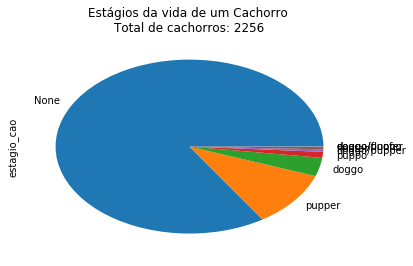

Quantidade Estágios de Cahorros
None             1831
pupper            224
doggo              75
puppo              24
doggo/pupper       10
floofer             9
doggo/floofer       1
doggo/puppo         1
Name: estagio_cao, dtype: int64


In [86]:
#Verificando e plotando os estágios de um Cão
estagio = df['estagio_cao'].value_counts()
estagio.plot(kind='pie')
plt.title('Estágios da vida de um Cachorro \nTotal de cachorros: {0}'.format(df.shape[0]))
plt.show()
print('Quantidade Estágios de Cahorros')
print(estagio)